In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import seaborn as sns

In [2]:
hotels = pd.read_csv('hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Обучим модель на числовых данных, пустые значения заменим нулями

In [4]:
hotels_num_name = hotels.select_dtypes(include=['object']).columns.tolist()
hotels_num  = hotels.drop(columns = hotels_num_name)
hotels_num = hotels_num.fillna(0)

In [5]:
def model_RandomForest(df):
    X = df.drop(['reviewer_score'], axis = 1)  
    y = df['reviewer_score'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    regr = RandomForestRegressor(n_estimators=100)  
    regr.fit(X_train, y_train)  
    y_pred = regr.predict(X_test)
    print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

In [6]:
model_RandomForest(hotels_num)

MAPE: 0.14133556484769333


Базовый MAPE 0,1413, попробуем обработать данные и улучшить результат

### Нормализация
Попробуем преобразовать признаки

In [7]:
hotels_scaled = hotels_num.copy()

In [8]:
hotels_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


<AxesSubplot:>

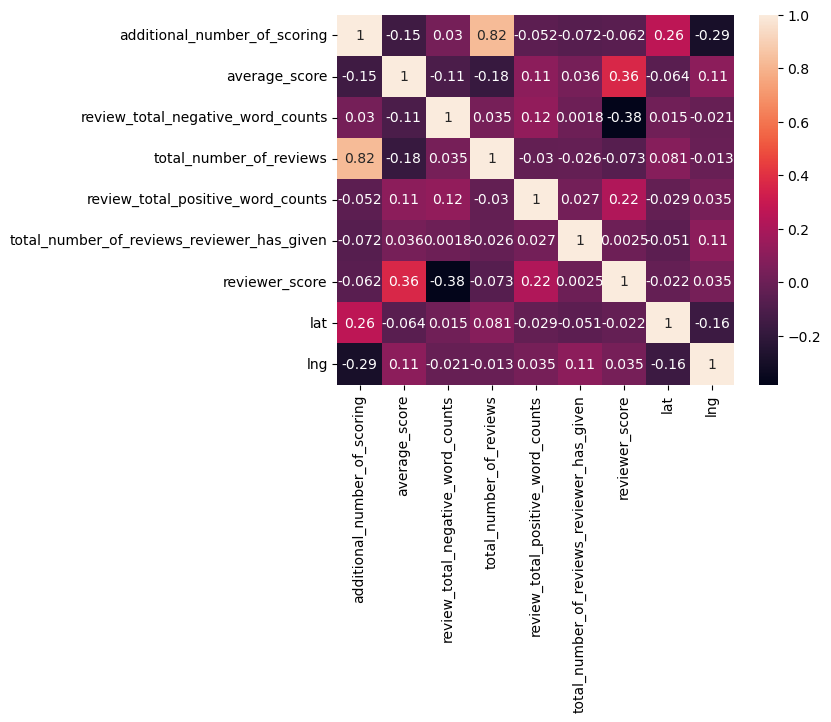

In [9]:
sns.heatmap(hotels_num.corr(), annot=True)

In [10]:
col_names = list(hotels_scaled.columns)

In [11]:
scaler = StandardScaler()
 
hotels_scaled = scaler.fit_transform(hotels_scaled.values)
df = pd.DataFrame(hotels_scaled, columns=col_names)
df 

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
0,0.165422,0.005054,-0.523140,-0.323767,-0.634121,-0.016034,0.979833,0.454844,-0.645338
1,-0.398288,-0.177467,-0.523140,-0.597030,-0.726176,0.617197,-1.281659,0.457353,-0.640836
2,-0.932013,0.917663,-0.422141,-1.009298,-0.818231,0.617197,-0.548202,-0.054572,-0.105009
3,-0.928015,-1.637641,-0.624138,-0.922527,-0.311928,0.074427,0.979833,-0.046284,-0.089933
4,0.831079,0.187576,-0.489473,2.090267,0.102320,0.255351,0.735348,0.622775,0.446722
...,...,...,...,...,...,...,...,...,...
386798,-0.782091,1.100184,-0.624138,-0.918210,-0.357956,0.255351,0.246376,0.452191,-0.655706
386799,-0.452260,0.005054,-0.624138,0.207217,3.462332,-0.558804,0.490862,-0.179509,2.974591
386800,-0.082451,-2.915293,-0.220143,0.003025,-0.403983,1.250429,-0.059231,0.457312,-0.642584
386801,-0.266356,-0.542511,-0.624138,-0.508101,-0.542066,1.883661,0.490862,0.456227,-0.648926


In [12]:
model_RandomForest(df)

MAPE: 1.408354459189234


### Вывод
Стандартизация ухудшила качество модели

In [13]:
hotels_RBscaled = hotels_num.copy()

In [14]:
r_scaler = RobustScaler()
hotels_RBscaled = scaler.fit_transform(hotels_RBscaled.values)
hotels_RBscaled = pd.DataFrame(hotels_RBscaled, columns=col_names)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
0,0.165422,0.005054,-0.523140,-0.323767,-0.634121,-0.016034,0.979833,0.454844,-0.645338
1,-0.398288,-0.177467,-0.523140,-0.597030,-0.726176,0.617197,-1.281659,0.457353,-0.640836
2,-0.932013,0.917663,-0.422141,-1.009298,-0.818231,0.617197,-0.548202,-0.054572,-0.105009
3,-0.928015,-1.637641,-0.624138,-0.922527,-0.311928,0.074427,0.979833,-0.046284,-0.089933
4,0.831079,0.187576,-0.489473,2.090267,0.102320,0.255351,0.735348,0.622775,0.446722
...,...,...,...,...,...,...,...,...,...
386798,-0.782091,1.100184,-0.624138,-0.918210,-0.357956,0.255351,0.246376,0.452191,-0.655706
386799,-0.452260,0.005054,-0.624138,0.207217,3.462332,-0.558804,0.490862,-0.179509,2.974591
386800,-0.082451,-2.915293,-0.220143,0.003025,-0.403983,1.250429,-0.059231,0.457312,-0.642584
386801,-0.266356,-0.542511,-0.624138,-0.508101,-0.542066,1.883661,0.490862,0.456227,-0.648926


In [15]:
model_RandomForest(hotels_RBscaled)

MAPE: 1.4088552599733073


### Вывод
Нормализация ухудшила качество модели

С помощью метода рекурсивного исключения признаков попробуем улучшить качество модели, за счет отбора самых выжных признаков

In [16]:
from sklearn.feature_selection import RFE

In [17]:
    X = hotels_num.drop(['reviewer_score'], axis = 1)  
    y = hotels_num['reviewer_score'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
RFE_list = selector.get_feature_names_out().tolist()
RFE_list.append('reviewer_score')
hotels_num_RFE = hotels_num[RFE_list]


In [19]:
model_RandomForest(hotels_num_RFE)

MAPE: 0.14235890192302075


MAPE после отбора признаков ухудшился 

теперь с помощью метода SelectKBest попробуем улучшить качество модели

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

In [21]:
selector_KB = SelectKBest(f_regression, k=3)
selector_KB.fit(X_train, y_train) 

SelectKBest_list = selector.get_feature_names_out().tolist()
SelectKBest_list.append('reviewer_score')
hotels_num_SelectKBest = hotels_num[SelectKBest_list]

In [22]:
SelectKBest_list

['average_score',
 'review_total_negative_word_counts',
 'review_total_positive_word_counts',
 'reviewer_score']

In [23]:
model_RandomForest(hotels_num_SelectKBest)

MAPE: 0.1422976533218938


### Вывод
Применение методов отбора признаков на неподготовленных данных не показало улучшений качества модели.

Возможно, нужно улучшить заполнение пропусков, в поле hotel_address в конце указывается страна, попробуем заполнить пропуски средними данными по стране. 

In [24]:
hotels['country'] =  hotels['hotel_address'].apply(lambda x: x.split(' ')[-1])

<AxesSubplot:>

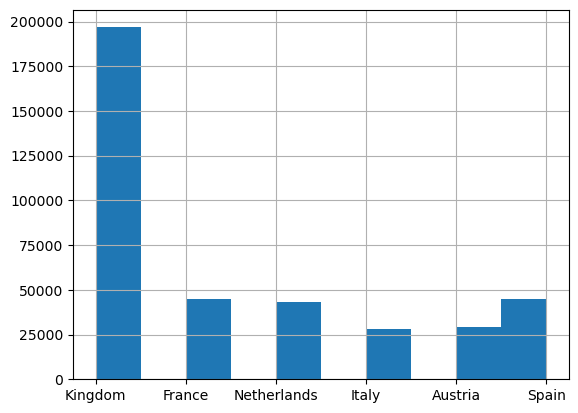

In [25]:
hotels['country'].hist()

In [26]:
med_lat_hotels = hotels.copy()

In [27]:
lat_bins = med_lat_hotels.groupby(['country'])
lat_bins.lat.median()

country
Austria        48.204465
France         48.866856
Italy          45.478736
Kingdom        51.510844
Netherlands    52.366373
Spain          41.388024
Name: lat, dtype: float64

In [28]:
med_lat_hotels.lat = lat_bins.lat.apply(lambda x: x.fillna(x.median()))
med_lat_hotels.lng = lat_bins.lng.apply(lambda x: x.fillna(x.median()))

In [29]:
med_lat_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [30]:
hotels_num_name_med = med_lat_hotels.select_dtypes(include=['object']).columns.tolist()
med_lat_hotels_num  = med_lat_hotels.drop(columns = hotels_num_name_med)

In [31]:
model_RandomForest(med_lat_hotels_num)

MAPE: 0.141245515864328


### Вывод
Заполнение пустых координат средними по стране улучшил MAPE. 

Анализ столбца Tags показал, что можно получить следующую информацию:
- есть ли питомцы
- тип поездки
- был ли сделан заказ с мобильного телефона
- тип посетителя
- тип комнаты
- длительность пребывания 

In [32]:
tag_hotels = med_lat_hotels.copy()

In [33]:
tag_hotels['tags'] = tag_hotels['tags'].str.replace('[','')
tag_hotels['tags'] = tag_hotels['tags'].str.replace(']','')
tag_hotels['tags'] = tag_hotels['tags'].str.replace(" ' ", '')
tag_hotels['tags'] = tag_hotels['tags'].str.replace(" '", '')
tag_hotels['tags'] = tag_hotels['tags'].str.replace("' ", '')

C:\Users\GubskayaDV\AppData\Local\Temp\ipykernel_18824\2492145875.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tag_hotels['tags'] = tag_hotels['tags'].str.replace('[','')
C:\Users\GubskayaDV\AppData\Local\Temp\ipykernel_18824\2492145875.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tag_hotels['tags'] = tag_hotels['tags'].str.replace(']','')


In [34]:
def trip_type(row):
    if row['tags'].__contains__('Business'):
        return 'Business'
    if row['tags'].__contains__('Leisure'):
        return 'Leisure'
    else:
        return 'Other'
tag_hotels['Trip_type'] = tag_hotels.apply(trip_type, axis=1)

In [35]:
tag_hotels['Has_pet'] = tag_hotels['tags'].apply(lambda x: 1 if x.__contains__('With a pet') else 0)
tag_hotels['Mobile'] = tag_hotels['tags'].apply(lambda x: 1 if x.__contains__('Submitted from a mobile device') else 0)

In [36]:
tag_hotels['tags'] = tag_hotels['tags'].str.replace("With a pet,", '')
tag_hotels['tags'] = tag_hotels['tags'].str.replace("Leisure trip,", '')
tag_hotels['tags'] = tag_hotels['tags'].str.replace("Business trip,", '')
tag_hotels['tags'] = tag_hotels['tags'].str.replace(",Submitted from a mobile device", '')

In [37]:
tag_hotels[['Guest_type', 'Room_type', 'Duration']] = tag_hotels['tags'].str.split(',', expand=True)

In [38]:
regex = '\d+'
tag_hotels['Duration'] = tag_hotels['Duration'].str.findall(regex).str.get(0)
tag_hotels['Duration'] = pd.to_numeric(tag_hotels['Duration'])

In [39]:
#Предположим, что оценки гостей комнат повышенной комфортности отличаются 
def room_vip(row):
    if row['Room_type'] is None:
        return 0
    if row['Room_type'].__contains__('Deluxe'):
        return 1
    if row['Room_type'].__contains__('Executive'):
        return 1
    if row['Room_type'].__contains__('Luxury'):
        return 1
    if row['Room_type'].__contains__('Premium'):
        return 1
    else:
        return 0

tag_hotels['is_vip'] = tag_hotels.apply(room_vip, axis=1)

In [40]:
tag_hotels = tag_hotels.drop(['tags'], axis = 1)

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
columns_to_change = ['Trip_type', 'Has_pet', 'Mobile', 'Guest_type', 'country']
 
for column in columns_to_change:
 print('Число уникальных значений призкака {}: '.format(column),  tag_hotels[column].nunique())

Число уникальных значений призкака Trip_type:  3
Число уникальных значений призкака Has_pet:  2
Число уникальных значений призкака Mobile:  2
Число уникальных значений призкака Guest_type:  6
Число уникальных значений призкака country:  6


In [43]:
one_hot_encoder = OneHotEncoder()
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
hotels_onehot = one_hot_encoder.fit_transform(tag_hotels[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['Trip_type_Business' 'Trip_type_Leisure' 'Trip_type_Other' 'Has_pet_0'
 'Has_pet_1' 'Mobile_0' 'Mobile_1' 'Guest_type_Couple'
 'Guest_type_Family with older children'
 'Guest_type_Family with young children' 'Guest_type_Group'
 'Guest_type_Solo traveler' 'Guest_type_Travelers with friends'
 'country_Austria' 'country_France' 'country_Italy' 'country_Kingdom'
 'country_Netherlands' 'country_Spain']


In [44]:
hotels_onehot = pd.DataFrame(hotels_onehot, index=tag_hotels.index, columns=column_names)

In [45]:
hotels_new = pd.concat([tag_hotels, hotels_onehot], axis=1)

In [46]:
hotels_new = hotels_new.drop(columns=columns_to_change)

In [47]:
hotels_num_name_new = tag_hotels.select_dtypes(include=['object']).columns.tolist()
hotels_num_new  = tag_hotels.drop(columns = hotels_num_name_new)
hotels_num_new = hotels_num_new.fillna(0)

In [48]:
model_RandomForest(hotels_num_new)

MAPE: 0.13928405887312134


### Вывод 
Добавление признаков из tag положительно отразилось на модели, оставляем ее и пробуем дальнейшее улучшение

Добавим признак количества дней после ревью

In [49]:
regex = '\d+'
hotels_new['days_since_review'] = hotels_new['days_since_review'].str.findall(regex).str.get(0)
hotels_new['days_since_review'] = hotels_new['days_since_review'].apply(pd.to_numeric)
hotels_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 38 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [50]:
hotels_new['days_since_review']

0         531
1         203
2         289
3         681
4         516
         ... 
386798    106
386799    171
386800    543
386801     74
386802    363
Name: days_since_review, Length: 386803, dtype: int64

Оценим не вошедшие столбцы

In [51]:
col_obj_check = hotels_new.select_dtypes(include=['object']).columns.tolist()
 
for column in col_obj_check:
 print('Число уникальных значений призкака {}: '.format(column),  hotels_new[column].nunique())

Число уникальных значений призкака hotel_address:  1493
Число уникальных значений призкака review_date:  731
Число уникальных значений призкака hotel_name:  1492
Число уникальных значений призкака reviewer_nationality:  225
Число уникальных значений призкака negative_review:  248828
Число уникальных значений призкака positive_review:  311737
Число уникальных значений призкака Room_type:  2328


Предполагаю, что дата может влиять на отзыв, разберем ее на составляющие

In [52]:
hotels_new['review_date'] = pd.to_datetime(hotels_new['review_date'])
hotels_new['Year'] = hotels_new['review_date'].dt.year
hotels_new['Month'] = hotels_new['review_date'].dt.month
hotels_new['Day_of_week'] = hotels_new['review_date'].dt.weekday
hotels_new.drop(['review_date'],axis = 1, inplace=True)

Национальность тоже важный признак, добавим его в модель

In [53]:
columns_to_change = ['reviewer_nationality']

In [54]:
one_hot_encoder = OneHotEncoder()
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
hotels_onehot = one_hot_encoder.fit_transform(hotels_new[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['reviewer_nationality_ ' 'reviewer_nationality_ Abkhazia Georgia '
 'reviewer_nationality_ Afghanistan ' 'reviewer_nationality_ Albania '
 'reviewer_nationality_ Algeria ' 'reviewer_nationality_ American Samoa '
 'reviewer_nationality_ Andorra ' 'reviewer_nationality_ Angola '
 'reviewer_nationality_ Anguilla ' 'reviewer_nationality_ Antarctica '
 'reviewer_nationality_ Antigua Barbuda '
 'reviewer_nationality_ Argentina ' 'reviewer_nationality_ Armenia '
 'reviewer_nationality_ Aruba ' 'reviewer_nationality_ Australia '
 'reviewer_nationality_ Austria ' 'reviewer_nationality_ Azerbaijan '
 'reviewer_nationality_ Bahamas ' 'reviewer_nationality_ Bahrain '
 'reviewer_nationality_ Bangladesh ' 'reviewer_nationality_ Barbados '
 'reviewer_nationality_ Belarus ' 'reviewer_nationality_ Belgium '
 'reviewer_nationality_ Belize ' 'reviewer_nationality_ Benin '
 'reviewer_nationality_ Bermuda ' 'reviewer_nationality_ Bhutan '
 'reviewer_nationality_ Bolivia '
 'reviewer_nationality_ Bonaire S

In [55]:
hotels_onehot = pd.DataFrame(hotels_onehot, index=hotels_new.index, columns=column_names)

In [56]:
hotels_new = pd.concat([hotels_new, hotels_onehot], axis=1)

In [57]:
hotels_new = hotels_new.drop(columns=columns_to_change)

In [58]:
col_to_del = ['hotel_address', 'hotel_name', 'negative_review', 'positive_review', 'Room_type']
hotels_new = hotels_new.drop(columns=col_to_del)
hotels_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 259 entries, additional_number_of_scoring to reviewer_nationality_ Zimbabwe 
dtypes: float64(249), int64(10)
memory usage: 764.3 MB


In [59]:
hotels_new = hotels_new.fillna(0)

In [60]:
model_RandomForest(hotels_new)

MAPE: 0.13513972408671085


### Выводы
МАЕР улучшился с 0,1413 до 0,1351